In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
path = '/content/drive/MyDrive/HocMayThongKe_TH'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train = pd.read_csv(path+'/dataset/train/data.csv').reset_index()
y_train = pd.read_csv(path+'/dataset/train/label.csv').reset_index()
X_test = pd.read_csv(path+'/dataset/test/data.csv').reset_index()
y_test = pd.read_csv(path+'/dataset/test/label.csv').reset_index()

In [ ]:
y_train

array(['Giáo dục', 'Khoa học và công nghệ', 'Thời sự', ..., 'Thời sự',
       'Giải trí', 'Sức khỏe'], dtype=object)

In [ ]:
X_train = X_train['0'].values
y_train = y_train['Topic'].values

X_test = X_test['0'].values
y_test = y_test['Topic'].values

In [ ]:
X_train = X_train.flatten()
X_test = X_test.flatten()
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)
X_train_vector.shape[0]

2090

In [ ]:
X_train_vector.toarray()

In [ ]:
def TachNhan(str):
  X_train_chude = []
  for i in range(0, X_train.shape[0]):
    if y_train[i] == str:
      X_train_chude.append(X_train[i])
  return X_train_chude

In [ ]:
X_train_khoahoc = TachNhan('Khoa học và công nghệ')
X_train_thoisu = TachNhan('Thời sự')
X_train_kinhdoanh = TachNhan('Kinh doanh')
X_train_bds = TachNhan('Bất động sản')
X_train_giaitri = TachNhan('Giải trí')
X_train_thethao = TachNhan('Thể thao')
X_train_giaoduc = TachNhan('Giáo dục')
X_train_suckhoe = TachNhan('Sức khỏe')

In [ ]:
vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()
vectorizer3 = TfidfVectorizer()
vectorizer4 = TfidfVectorizer()
vectorizer5 = TfidfVectorizer()
vectorizer6 = TfidfVectorizer()
vectorizer7 = TfidfVectorizer()
vectorizer8 = TfidfVectorizer()

In [ ]:
X_train_khoahoc_vector = vectorizer1.fit_transform(X_train_khoahoc)
X_train_thoisu_vector = vectorizer2.fit_transform(X_train_thoisu)
X_train_kinhdoanh_vector = vectorizer3.fit_transform(X_train_kinhdoanh)
X_train_bds_vector = vectorizer4.fit_transform(X_train_bds)
X_train_giaitri_vector = vectorizer5.fit_transform(X_train_giaitri)
X_train_thethao_vector = vectorizer6.fit_transform(X_train_thethao)
X_train_giaoduc_vector = vectorizer7.fit_transform(X_train_giaoduc)
X_train_suckhoe_vector = vectorizer8.fit_transform(X_train_suckhoe)

In [ ]:
vocabulary_khoahoc = vectorizer1.vocabulary_
vocabulary_thoisu = vectorizer2.vocabulary_
vocabulary_kinhdoanh = vectorizer3.vocabulary_
vocabulary_bds = vectorizer4.vocabulary_
vocabulary_giaitri = vectorizer5.vocabulary_
vocabulary_thethao = vectorizer6.vocabulary_
vocabulary_giaoduc = vectorizer7.vocabulary_
vocabulary_suckhoe = vectorizer8.vocabulary_

In [ ]:
def DicttoDf(vocab_all):
  vocab_all= list(vocab_all.items())
  vocab_all= np.array(vocab_all)
  vocab_all_df= pd.DataFrame(vocab_all, columns=['words', 'order'])
  return vocab_all_df

In [ ]:
vocabulary_khoahoc = DicttoDf(vocabulary_khoahoc)
vocabulary_thoisu = DicttoDf(vocabulary_thoisu)
vocabulary_kinhdoanh = DicttoDf(vocabulary_kinhdoanh)
vocabulary_bds = DicttoDf(vocabulary_bds)
vocabulary_giaitri = DicttoDf(vocabulary_giaitri)
vocabulary_thethao = DicttoDf(vocabulary_thethao)
vocabulary_giaoduc = DicttoDf(vocabulary_giaoduc)
vocabulary_suckhoe = DicttoDf(vocabulary_suckhoe)

In [ ]:
def Duplicate_ratio(vocab_a, vocab_b):
  df1 = vocab_a['words'].to_frame()
  df2 = vocab_b['words'].to_frame()
  column_to_compare = 'words'
  duplicated_percentage = len(df1[df1[column_to_compare].isin(df2[column_to_compare])]) / len(df1)
  return duplicated_percentage

In [ ]:
labels = ['Thời sự', 'Bất động sản', 'Kinh doanh', 'Khoa học và công nghệ', 'Giải trí', 'Thể thao', 'Giáo dục', 'Sức khỏe']
vocab = [vocabulary_thoisu, vocabulary_bds, vocabulary_kinhdoanh, vocabulary_khoahoc, vocabulary_giaitri, vocabulary_thethao, vocabulary_giaoduc, vocabulary_suckhoe]

Chưa xóa stopword

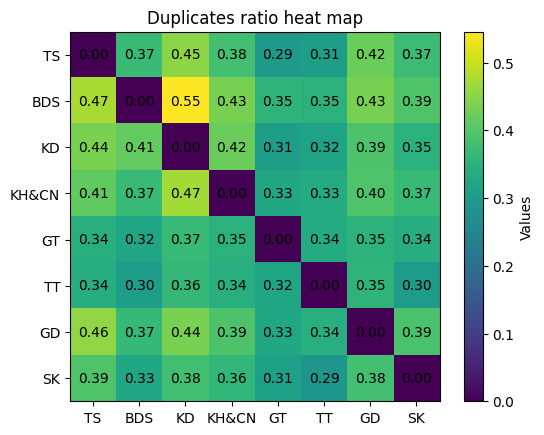

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

matrix_data = np.random.rand(8, 8)
matrix_data[:] = 0

for i in range (0, 8):
  for j in range (i+1, 8):
    matrix_data[i,j] = Duplicate_ratio(vocab[i], vocab[j])

for i in range (7, -1, -1):
  for j in range (i-1, -1, -1):
    matrix_data[i,j] = Duplicate_ratio(vocab[i], vocab[j])

plt.imshow(matrix_data, cmap='viridis', interpolation='nearest')

for i in range(len(matrix_data)):
    for j in range(len(matrix_data[i])):
        plt.text(j, i, f'{matrix_data[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Duplicates ratio heat map')
plt.colorbar(label='Values')

plt.xticks(np.arange(len(matrix_data)), labels=['TS', 'BDS', 'KD', 'KH&CN', 'GT', 'TT', 'GD', 'SK'])
plt.yticks(np.arange(len(matrix_data)), labels=['TS', 'BDS', 'KD', 'KH&CN', 'GT', 'TT', 'GD', 'SK'])

plt.show()


Đã xóa stopword

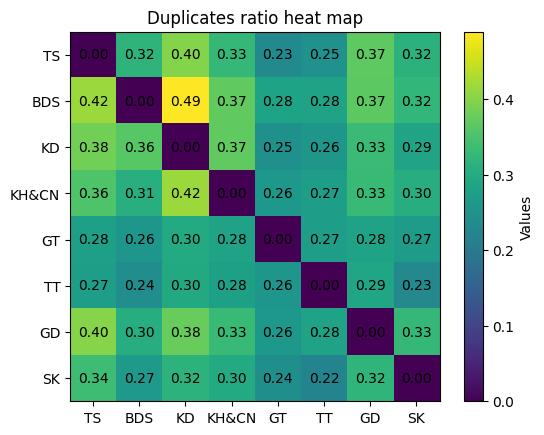

In [ ]:
matrix_data = np.random.rand(8, 8)
matrix_data[:] = 0

for i in range (0, 8):
  for j in range (i+1, 8):
    matrix_data[i,j] = Duplicate_ratio(vocab[i], vocab[j])

for i in range (7, -1, -1):
  for j in range (i-1, -1, -1):
    matrix_data[i,j] = Duplicate_ratio(vocab[i], vocab[j])

plt.imshow(matrix_data, cmap='viridis', interpolation='nearest')

for i in range(len(matrix_data)):
    for j in range(len(matrix_data[i])):
        plt.text(j, i, f'{matrix_data[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Duplicates ratio heat map')
plt.colorbar(label='Values')

plt.xticks(np.arange(len(matrix_data)), labels=['TS', 'BDS', 'KD', 'KH&CN', 'GT', 'TT', 'GD', 'SK'])
plt.yticks(np.arange(len(matrix_data)), labels=['TS', 'BDS', 'KD', 'KH&CN', 'GT', 'TT', 'GD', 'SK'])

plt.show()


In [ ]:
vocab_original = []
for i in range (0, 8):
  vocab_original.append(len(vocab[i]))
for i in range (0, 8):
  dup_list = (vocab[0]).iloc[0:0]
  for j in range (i+1, 8):
    duplicates = pd.merge(vocab[i], vocab[j], on='words')
    vocab[j] = vocab[j].drop(vocab[j][vocab[j]['words'].isin(duplicates['words'])].index)
    dup_list = pd.concat([dup_list, duplicates])
  vocab[i] = vocab[i].drop(vocab[i][vocab[i]['words'].isin(dup_list['words'])].index)

Chưa xóa stopword

In [ ]:
for i in range (0, 8):
  print(f"Số lượng từ không trùng lặp trong nhãn '{labels[i]}' là {len(vocab[i])}, chiếm tỷ lệ: {(len(vocab[i])/vocab_original[i])*100:.2f}%")

Số lượng từ không trùng lặp trong nhãn 'Thời sự' là 638, chiếm tỷ lệ: 27.79%
Số lượng từ không trùng lặp trong nhãn 'Bất động sản' là 423, chiếm tỷ lệ: 23.47%
Số lượng từ không trùng lặp trong nhãn 'Kinh doanh' là 611, chiếm tỷ lệ: 25.70%
Số lượng từ không trùng lặp trong nhãn 'Khoa học và công nghệ' là 615, chiếm tỷ lệ: 28.95%
Số lượng từ không trùng lặp trong nhãn 'Giải trí' là 731, chiếm tỷ lệ: 36.99%
Số lượng từ không trùng lặp trong nhãn 'Thể thao' là 849, chiếm tỷ lệ: 40.96%
Số lượng từ không trùng lặp trong nhãn 'Giáo dục' là 593, chiếm tỷ lệ: 27.76%
Số lượng từ không trùng lặp trong nhãn 'Sức khỏe' là 759, chiếm tỷ lệ: 34.88%


Đã xóa stopword

In [ ]:
for i in range (0, 8):
  print(f"Số lượng từ không trùng lặp trong nhãn '{labels[i]}' là {len(vocab[i])}, chiếm tỷ lệ: {(len(vocab[i])/vocab_original[i])*100:.2f}%")

Số lượng từ không trùng lặp trong nhãn 'Thời sự' là 638, chiếm tỷ lệ: 30.81%
Số lượng từ không trùng lặp trong nhãn 'Bất động sản' là 421, chiếm tỷ lệ: 26.56%
Số lượng từ không trùng lặp trong nhãn 'Kinh doanh' là 611, chiếm tỷ lệ: 28.52%
Số lượng từ không trùng lặp trong nhãn 'Khoa học và công nghệ' là 615, chiếm tỷ lệ: 32.33%
Số lượng từ không trùng lặp trong nhãn 'Giải trí' là 730, chiếm tỷ lệ: 41.67%
Số lượng từ không trùng lặp trong nhãn 'Thể thao' là 850, chiếm tỷ lệ: 45.70%
Số lượng từ không trùng lặp trong nhãn 'Giáo dục' là 592, chiếm tỷ lệ: 31.13%
Số lượng từ không trùng lặp trong nhãn 'Sức khỏe' là 758, chiếm tỷ lệ: 39.11%
